
# Solid Core Step index fiber with Cladding that terminates

In Marcuse's second (later) book, he mentions effects of terminating cladding are minimal.  Here we investigate.

In [1]:
import numpy as np

from fiberamp.fiber.microstruct.bragg import BraggExact
from step_exact import plotlogf, plotlogf_real
from ngsolve.webgui import Draw
from ngsolve import CF
from scipy.optimize import newton


importing NGSolve-6.2.2203-56-g47f483033


In [2]:
n_core = 1.6
n_clad = 1.5
n_air = 1

In [3]:
A = BraggExact(ts=[1e-6,8e-6, 2e-6], mats=['core', 'clad', 'air'], 
               ns=[lambda x:n_core, lambda x: n_clad, lambda x:n_air],
              maxhs=[.1,.1, .1], wl=1.8e-6, scale=1e-6)


In [4]:
Draw(CF([n for n in A.ns]), A.mesh)

WebGuiWidget(value={'ngsolve_version': '6.2.2203-56-g47f483033', 'mesh_dim': 2, 'order2d': 2, 'order3d': 2, 'd…

BaseWebGuiScene

In [5]:
k_low = A.k0 * A.ns[2] * A.scale
k_mid = A.k0 * A.ns[1] * A.scale
k_high = A.k0 * A.ns[0] * A.scale
outer = 'h1'
nu = 1

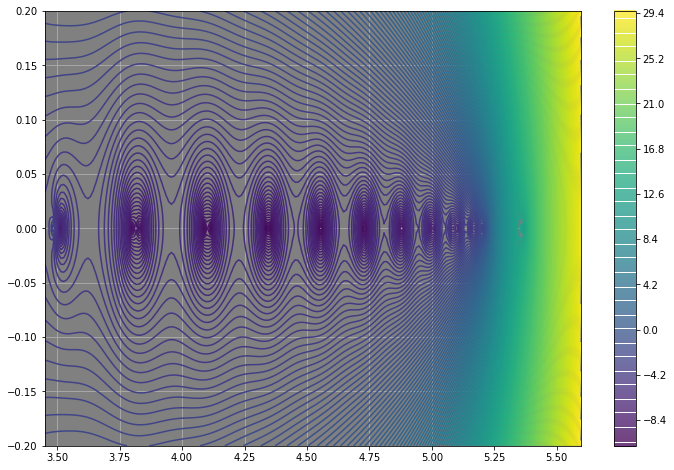

In [6]:
%matplotlib inline
plotlogf(A.determinant, k_low-.04, k_high+.01, -.2,.2, nu, outer,
         iref=200, rref=200, levels=200)

### This appears to be the near continuum of cladding modes Marcuse mentions Theory of Dielectric Waveguides.

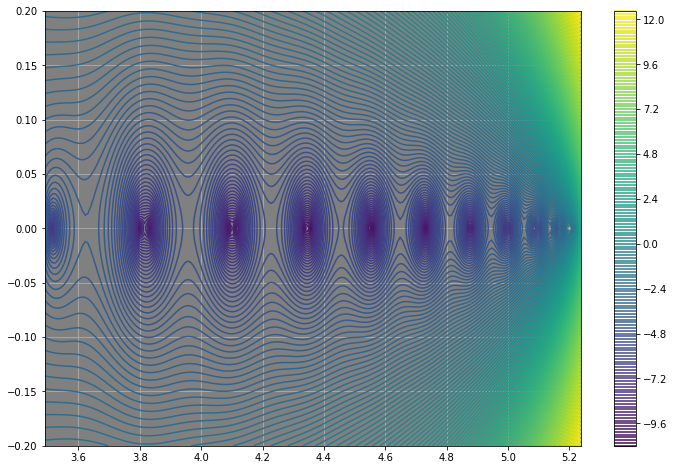

In [7]:
%matplotlib inline
plotlogf(A.determinant, k_low, k_mid, -.2,.2, nu, outer,
         iref=200, rref=200, levels=200)

In [ ]:
%matplotlib inline
plotlogf(A.determinant, k_mid, k_high, -.1,.1, nu, outer,
         iref=200, rref=200, levels=200)

In [ ]:
%matplotlib notebook
plotlogf_real(A.determinant, k_low-.01, k_mid, nu, outer, n=20000, figsize=(10,5),
              truncate=True, height=.01)

In [ ]:
guess = np.array(3.835)

beta1 = newton(A.determinant, guess, args=(nu, outer), tol = 1e-10)

print("Scaled beta: ", beta1, ". Residual of determinant: ", abs(A.determinant(beta1, nu, outer)))


# Bragg Exact Fields

In [ ]:
Fs = A.all_fields(beta1, nu, outer)

In [ ]:
Draw(Fs['Ez'], A.mesh)

In [ ]:
Draw(Fs['Hz'], A.mesh)

In [ ]:
Draw(Fs['Etv'].real, A.mesh, vectors={'grid_size':100})


In [ ]:
Draw(Fs['Etv'].real, A.mesh, vectors={'grid_size':100})


In [ ]:
Draw(Fs['Ephi'], A.mesh)

In [ ]:
Draw(Fs['Hphi'], A.mesh)